# 数据来源：NCEP/NCAR 月平均的位势高度场
# 实习要求
(1)计算1980-2010年（30年）7月850 hPa 的平均高度场，绘制环流平均图；
(2)计算2010年7月850 hPa 的高度距平，绘制高度距平场图（相对于1980-2010年共30年的平均)；
(3)计算2010年7月850 hPa 的高度场纬偏值，绘制环流纬偏图。

In [1]:
# 导入需要用到的库
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

In [2]:
# 创建地图函数
def createmap():
    proj = ccrs.PlateCarree(central_longitude=180)
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    # 设置大小刻度
    minorticks = MultipleLocator(10)
    majorticks = MultipleLocator(30)
    ax.xaxis.set_major_locator(majorticks)
    ax.xaxis.set_minor_locator(minorticks)
    ax.yaxis.set_minor_locator(minorticks)
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    return ax, fig

In [3]:
ds = xr.open_dataset('D:\WORKcode\DuanQiQiHou\data\hgt.mon.mean.nc')['hgt']
ds

<xarray.DataArray 'hgt' (time: 855, level: 17, lat: 73, lon: 144)>
[152791920 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-03-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [4]:
lat = ds['lat']
lon = ds['lon']
lons, lats = np.meshgrid(lon, lat)

In [5]:
ds1 = ds.loc[ds.time.dt.month.isin([7])].loc["1980-01-01":'2010-12-01', 850, :, :]

In [6]:
ds1

<xarray.DataArray 'hgt' (time: 31, lat: 73, lon: 144)>
[325872 values with dtype=float32]
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1980-07-01 1981-07-01 ... 2010-07-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [7]:
avehgt850 = ds1.mean(dim='time')
avehgt850

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[1377.1571, 1377.1571, 1377.1571, ..., 1377.1571, 1377.1571,
        1377.1571],
       [1379.7501, 1379.7429, 1379.7438, ..., 1379.7212, 1379.7356,
        1379.7336],
       [1384.7316, 1384.7471, 1384.7336, ..., 1384.9095, 1384.8129,
        1384.7576],
       ...,
       [1332.029 , 1339.7421, 1347.1458, ..., 1307.742 , 1315.9937,
        1324.1195],
       [1343.6171, 1347.329 , 1351.0156, ..., 1332.2048, 1336.0272,
        1339.8408],
       [1330.0614, 1330.0614, 1330.0614, ..., 1330.0614, 1330.0614,
        1330.0614]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [8]:
print(avehgt850.max(),avehgt850.min())

<xarray.DataArray 'hgt' ()>
array(1616.3560791)
Coordinates:
    level    float32 850.0 <xarray.DataArray 'hgt' ()>
array(1047.05310059)
Coordinates:
    level    float32 850.0


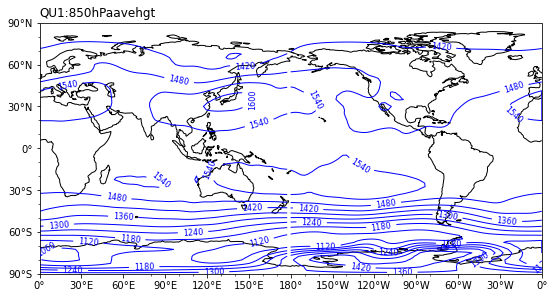

In [9]:
ax,fig = createmap()
denglines = ax.contour(lons, lats, avehgt850, levels=np.arange(1000, 1620, 60), colors='blue',linewidths=1)
plt.clabel(denglines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('QU1:850hPaavehgt',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\1.png')


In [10]:
hgt850_7=ds1.loc['2010-07-01']
hgt850_7

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[1310.871 , 1310.871 , 1310.871 , ..., 1310.871 , 1310.871 , 1310.871 ],
       [1332.742 , 1332.2903, 1332.1613, ..., 1333.3226, 1333.1936, 1332.9032],
       [1354.5807, 1354.4517, 1354.129 , ..., 1355.4193, 1355.0968, 1354.871 ],
       ...,
       [1293.7097, 1301.    , 1307.742 , ..., 1269.4193, 1277.871 , 1285.9354],
       [1277.9354, 1281.4193, 1284.8064, ..., 1266.8064, 1270.6451, 1274.3871],
       [1233.3549, 1233.3549, 1233.3549, ..., 1233.3549, 1233.3549, 1233.3549]],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [11]:
juping_hgt850_7=hgt850_7-avehgt850
juping_hgt850_7

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[-66.28613 , -66.28613 , -66.28613 , ..., -66.28613 , -66.28613 ,
        -66.28613 ],
       [-47.00818 , -47.452637, -47.58252 , ..., -46.39856 , -46.541992,
        -46.830444],
       [-30.150879, -30.29541 , -30.604614, ..., -29.490234, -29.716064,
        -29.886597],
       ...,
       [-38.319336, -38.742065, -39.40381 , ..., -38.32263 , -38.12268 ,
        -38.184082],
       [-65.68164 , -65.90967 , -66.20923 , ..., -65.39844 , -65.38208 ,
        -65.453735],
       [-96.70654 , -96.70654 , -96.70654 , ..., -96.70654 , -96.70654 ,
        -96.70654 ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01

In [12]:
print(juping_hgt850_7.max(),juping_hgt850_7.min())

<xarray.DataArray 'hgt' ()>
array(80.37451172)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01 <xarray.DataArray 'hgt' ()>
array(-136.44232178)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01


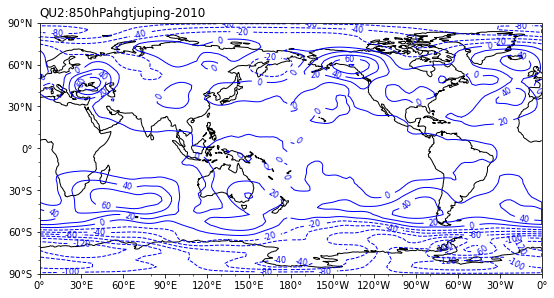

In [13]:
ax,fig = createmap()
denglines = ax.contour(lons, lats, juping_hgt850_7, levels=np.arange(-140, 82, 20), colors='blue',linewidths=1)
plt.clabel(denglines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('QU2:850hPahgtjuping-2010',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\2.png')

In [14]:
avehgt850_lat=hgt850_7.mean(dim='lat')
avehgt850_lat

<xarray.DataArray 'hgt' (lon: 144)>
array([1421.1802, 1422.4761, 1423.7429, 1424.8765, 1425.7847, 1426.4613,
       1427.113 , 1427.8846, 1428.6709, 1429.1047, 1429.1653, 1429.1294,
       1429.4279, 1430.0717, 1430.5919, 1430.5509, 1429.9645, 1429.1882,
       1428.247 , 1426.7913, 1424.4684, 1421.3645, 1417.7986, 1413.8943,
       1409.5654, 1405.0013, 1400.8025, 1397.6051, 1395.539 , 1394.268 ,
       1393.4069, 1392.9241, 1393.0466, 1393.7709, 1394.9274, 1396.2682,
       1397.6656, 1398.9852, 1399.9109, 1400.1428, 1399.7594, 1399.1802,
       1398.8864, 1399.0679, 1399.5424, 1400.2069, 1400.9722, 1401.9148,
       1403.0757, 1404.5802, 1406.4432, 1408.5774, 1410.6989, 1412.495 ,
       1413.7114, 1414.3982, 1414.6223, 1414.568 , 1414.4316, 1414.3301,
       1414.2147, 1413.9546, 1413.5072, 1412.8436, 1411.9146, 1410.6383,
       1409.0679, 1407.3445, 1405.5396, 1403.5099, 1401.2344, 1398.8916,
       1396.7534, 1394.9658, 1393.6531, 1392.9307, 1392.8827, 1393.5125,
       1394.7319, 1396.4728, 1398.6136, 1400.9752, 1403.3356, 1405.5581,
       1407.5056, 1409.2058, 1410.6321, 1411.7588, 1412.3391, 1412.1798,
       1411.1888, 1409.6565, 1408.0516, 1406.7313, 1405.7163, 1404.9955,
       1404.6549, 1404.7723, 1405.2184, 1405.8273, 1406.5935, 1407.7181,
       1409.2487, 1411.0107, 1412.7277, 1414.1873, 1415.1777, 1415.5282,
       1415.3514, 1414.8827, 1414.3414, 1413.4866, 1412.2638, 1411.0828,
       1410.7389, 1411.5039, 1412.4927, 1412.685 , 1412.0702, 1411.6743,
       1412.5286, 1414.4236, 1416.4874, 1418.126 , 1419.5472, 1421.1257,
       1422.8135, 1424.2415, 1425.2421, 1425.8656, 1426.1576, 1426.086 ,
       1425.6279, 1424.8201, 1423.7457, 1422.4894, 1421.136 , 1419.8401,
       1418.648 , 1417.7162, 1417.2981, 1417.5802, 1418.541 , 1419.839 ],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01

In [15]:
weipianzhi=hgt850_7-avehgt850_lat
weipianzhi

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[-110.309204, -111.6051  , -112.87195 , ..., -106.70923 ,
        -107.670044, -108.96802 ],
       [ -88.43823 ,  -90.18579 ,  -91.581665, ...,  -84.25757 ,
         -85.34741 ,  -86.93579 ],
       [ -66.59949 ,  -68.024414,  -69.61389 , ...,  -62.16089 ,
         -63.444214,  -64.96802 ],
       ...,
       [-127.47046 , -121.476074, -116.00098 , ..., -148.16089 ,
        -140.67004 , -133.90356 ],
       [-143.24475 , -141.05676 , -138.93652 , ..., -150.7738  ,
        -147.89587 , -145.4519  ],
       [-187.82532 , -189.12122 , -190.38806 , ..., -184.22534 ,
        -185.18616 , -186.48413 ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01

In [16]:
print(weipianzhi.max(),weipianzhi.min())

<xarray.DataArray 'hgt' ()>
array(227.6973877)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01 <xarray.DataArray 'hgt' ()>
array(-483.07751465)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01


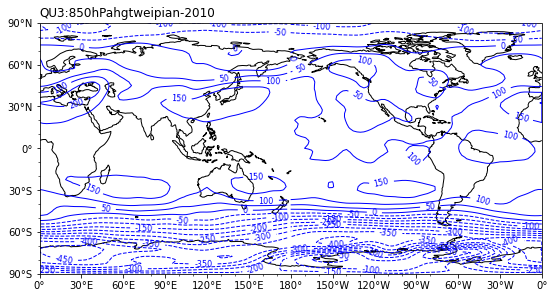

In [17]:
ax,fig = createmap()
denglines = ax.contour(lons, lats, weipianzhi, levels=np.arange(-500, 230, 50), colors='blue',linewidths=1)
plt.clabel(denglines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('QU3:850hPahgtweipian-2010',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\3.png')